<a href="https://colab.research.google.com/github/eel-eel-eel/ric1340/blob/main/ch07_02_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

環境構築

※2023/04のGoogle colaboratoryのPython3.10へのアップデートに伴い、使用するライブラリを変更したため、コードを大幅に修正

もし、ch07_02_imbalance.ipynbを実行していない場合は、/content/drive/MyDrive/bert/5_1_livedoor_news/title_dataset2のフォルダやその中のファイルが作成されていません。/content/drive/MyDrive/bert/5_1_livedoor_news/title_dataset2にtrain、dev、testがあることを確認した上で、こちらのノートブックに戻ってきてください。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers[ja]==4.22.2 datasets==2.12.0 evaluate==0.4.0 daaja==0.0.8
!pip install --upgrade accelerate==0.19.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 102.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.9/599.9 kB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 81.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212

In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
!mkdir -p /content/drive/MyDrive/bert/5_1_livedoor_news/title_dataset3
!cp /content/drive/MyDrive/bert/5_1_livedoor_news/title_dataset2/* /content/drive/MyDrive/bert/5_1_livedoor_news/title_dataset3/

In [ ]:
from daaja.methods.eda.easy_data_augmentor import EasyDataAugmentor
augmentor = EasyDataAugmentor(alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=10)

In [ ]:
new_data = []
for line in open('/content/drive/MyDrive/bert/5_1_livedoor_news/title_dataset3/train.tsv','r'):
  id, label, title = line.split("\t")
  if id =='2':
    aug_texts = augmentor.augments(title.rstrip())
    for t in aug_texts:
      if len(t) < 5:
        continue
      new_data.append(f'{id}\t{label}\t{t}')
  else:
    new_data.append(line.rstrip())


augment: 100%|██████████| 4/4 [00:00<00:00, 19.19it/s]


In [ ]:
new_data[1:20]

['1\tpeachy\t見ておきたい！豪華なクリスマスツリー',
 '1\tpeachy\t宮坂絵美里が“美”をレクチャー\u3000「ビューティ・キャンプ・メソッド 2010」',
 '0\tkaden-channel\tスティーブ・ジョブズが広告業界で「名誉の殿堂」入り！【話題】',
 '1\tpeachy\t巣ごもリッチに最適なワイン付き「オーガニックワイン入門講座」',
 '1\tpeachy\tフルーツの香りにお肌もうっとり、韓国のフルーツ系クレンジング',
 '0\tkaden-channel\tたくましい？恥ずかしい？ネットで学費援助を求める女子大生が登場！【話題】',
 '1\tpeachy\t文房具もキラキラに！\u3000加速する最新の“デコ”トレンドは？',
 '0\tkaden-channel\t１２年振りの新曲は音質違いを複数リリース！\u3000LUNA SEAが切り開く新しい音楽ビジネス【話題】',
 '0\tkaden-channel\t三菱電機、ＬＥＤ照明の新ブランド「ミライエ」を展開【話題】',
 '1\tpeachy\t頑張れないガールのための「ごまかし美脚コーデ術」／夏の美脚特集',
 '1\tpeachy\t素敵なノートを買うと、恵まれない子供達にノートがプレゼントされるWノート',
 '1\tpeachy\tSHIHOさんが、南国の心地よい風を満喫して走る「グアム ココ ロードレース」に挑戦！',
 '0\tkaden-channel\tiPhoneの値段が高すぎる！\u3000急成長するブラジルに家電メーカーが国内工場や子会社を作るわけ【話題】',
 '1\tpeachy\t【終了しました】女子の大事な下着を優しく干せる「ランジェリーキーパー」を5名様にプレゼント',
 '2\tit-life-hack\t2200重力加速度mAhでわずか65g！執り行うGALAXYを最強にするバッテリー内蔵ケース【イケショップのレア物】',
 '2\tit-life-hack\t2200mAhでわずか65GALAXY！イケショップを最強にするバッテリー内蔵ケース【gのレア物】',
 '2\tit-life-hack\t2200mAhで乾電池わずか65g！GALAXY重力加速度を最強にするバッテリー内蔵ケース【イケショップのレア物】',

In [ ]:
!mv /content/drive/MyDrive/bert/5_1_livedoor_news/title_dataset3/train.tsv /content/drive/MyDrive/bert/5_1_livedoor_news/title_dataset3/bk_train.tsv

In [ ]:
cd /content/drive/MyDrive/bert/5_1_livedoor_news

/content/drive/MyDrive/bert/5_1_livedoor_news


In [ ]:
with open('/content/drive/MyDrive/bert/5_1_livedoor_news/title_dataset3/train.tsv', 'w') as f:
  f.write("id	label	title\n")
  for data in new_data[1:]:
    f.write("%s\n" % data)

In [ ]:
from transformers import BertJapaneseTokenizer
n_tokens = 256

tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')
tokenizer.model_max_length = n_tokens

In [ ]:
import pandas as pd

df_title_dataset_train = pd.read_csv('title_dataset3/train.tsv', sep='\t', usecols=['id', 'label', 'title'])
df_title_dataset_dev = pd.read_csv('title_dataset3/dev.tsv', sep='\t', usecols=['id', 'label', 'title'])
df_title_dataset_test = pd.read_csv('title_dataset3/test.tsv', sep='\t', usecols=['id', 'label', 'title'])

random_seed = 42
df_title_dataset_train = df_title_dataset_train.sample(frac=1, random_state=random_seed)

In [ ]:
label2id = {label: id for id, label in df_title_dataset_train[['id', 'label']].values}
id2label = {id: label for id, label in df_title_dataset_train[['id', 'label']].values}

keys = list(id2label.keys())
keys.sort()
id2label = {i: id2label[i] for i in keys}

values = list(label2id.values())
values.sort()
label2id = {id2label[i]:i for i in values}

In [ ]:
label2id

{'kaden-channel': 0, 'peachy': 1, 'it-life-hack': 2}

In [ ]:
id2label

{0: 'kaden-channel', 1: 'peachy', 2: 'it-life-hack'}

In [ ]:
df_title_dataset_train['id'].value_counts()

2    1628
0     678
1     673
Name: id, dtype: int64

In [ ]:
from datasets import Dataset
from datasets import concatenate_datasets, load_dataset, DatasetDict

d = {
    'train':Dataset.from_pandas(df_title_dataset_train.loc[:, ["title", "id"]]),
     'dev':Dataset.from_pandas(df_title_dataset_dev.loc[:, ["title", "id"]]),
     'test':Dataset.from_pandas(df_title_dataset_test.loc[:, ["title", "id"]])
     }

dataset = DatasetDict(d)
dataset.set_format("pt")

#BertForSequenceClassificationの学習時のフォーマットに変更
dataset = dataset.rename_column("title", "text")
dataset = dataset.rename_column("id", "labels")

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2979 [00:00<?, ? examples/s]

Map:   0%|          | 0/258 [00:00<?, ? examples/s]

Map:   0%|          | 0/258 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import evaluate
import numpy as np
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")
precision = evaluate.load("precision")
recall = evaluate.load("recall")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return f1.compute(predictions=predictions, references=labels, average="macro")

In [ ]:
import torch
from transformers import BertForSequenceClassification, TrainingArguments, Trainer
model = BertForSequenceClassification.from_pretrained(
    'cl-tohoku/bert-base-japanese-whole-word-masking',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id)

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialize

In [ ]:
random_seed=42
batch_size=16
epoch=5
lr=1e-5
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/bert/5_1_livedoor_news/model/",
    learning_rate=lr,
    optim='adamw_torch',
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=epoch,
    evaluation_strategy="steps",
    push_to_hub=False,
    seed=random_seed,
    load_best_model_at_end=True,
    save_total_limit=1,
    save_strategy="steps"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["dev"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 2979
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 935


Step,Training Loss,Validation Loss,F1
500,0.187900,0.233285,0.934946


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 258
  Batch size = 16
Saving model checkpoint to /content/drive/MyDrive/bert/5_1_livedoor_news/model/checkpoint-500
Configuration saved in /content/drive/MyDrive/bert/5_1_livedoor_news/model/checkpoint-500/config.json
Model weights saved in /content/drive/MyDrive/bert/5_1_livedoor_news/model/checkpoint-500/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/bert/5_1_livedoor_news/model/checkpoint-500/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/bert/5_1_livedoor_news/model/checkpoint-500/special_tokens_map.json
Deleting older checkpoint [/content/drive/MyDrive/bert/5_1_livedoor_news/model/checkpoint-1000] due to args.save_total_limit


T

TrainOutput(global_step=935, training_loss=0.10627153519003149, metrics={'train_runtime': 159.9068, 'train_samples_per_second': 93.148, 'train_steps_per_second': 5.847, 'total_flos': 275828681975742.0, 'train_loss': 0.10627153519003149, 'epoch': 5.0})

In [ ]:
predictions = trainer.predict(tokenized_dataset["test"])
preds = np.argmax(predictions.predictions, axis=-1)
trues = dataset["test"]["labels"].to('cpu').detach().numpy().copy()

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 258
  Batch size = 16


In [ ]:
print('精度　 :{:.3f}'.format(accuracy.compute(predictions=preds, references=trues)["accuracy"]))
print('適合率 :{:.3f}'.format(precision.compute(predictions=preds, references=trues, average="macro")["precision"]))
print('再現率 :{:.3f}'.format(recall.compute(predictions=preds, references=trues, average="macro")["recall"]))
print('f-1値  :{:.3f}'.format(f1.compute(predictions=preds, references=trues, average="macro")["f1"]))

精度　 :0.926
適合率 :0.925
再現率 :0.920
f-1値  :0.921


0 kaden-channel
1 peachy
2 it-life-hack


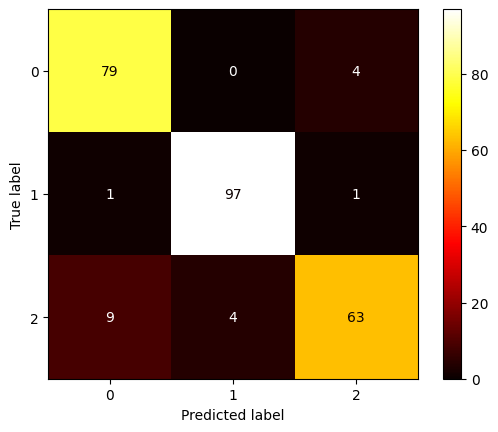

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = [v for v in label2id.values()]

cm = confusion_matrix(trues,preds, labels=labels)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(cmap=plt.cm.hot, values_format='d')

for k,v in label2id.items(): print(v, k)